# 3.1 Многослойный перцептрон

# Вопрос
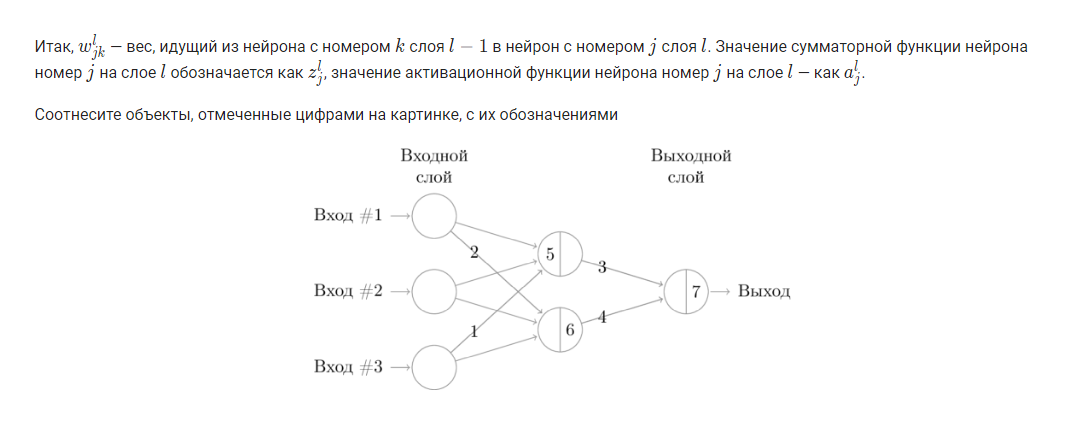

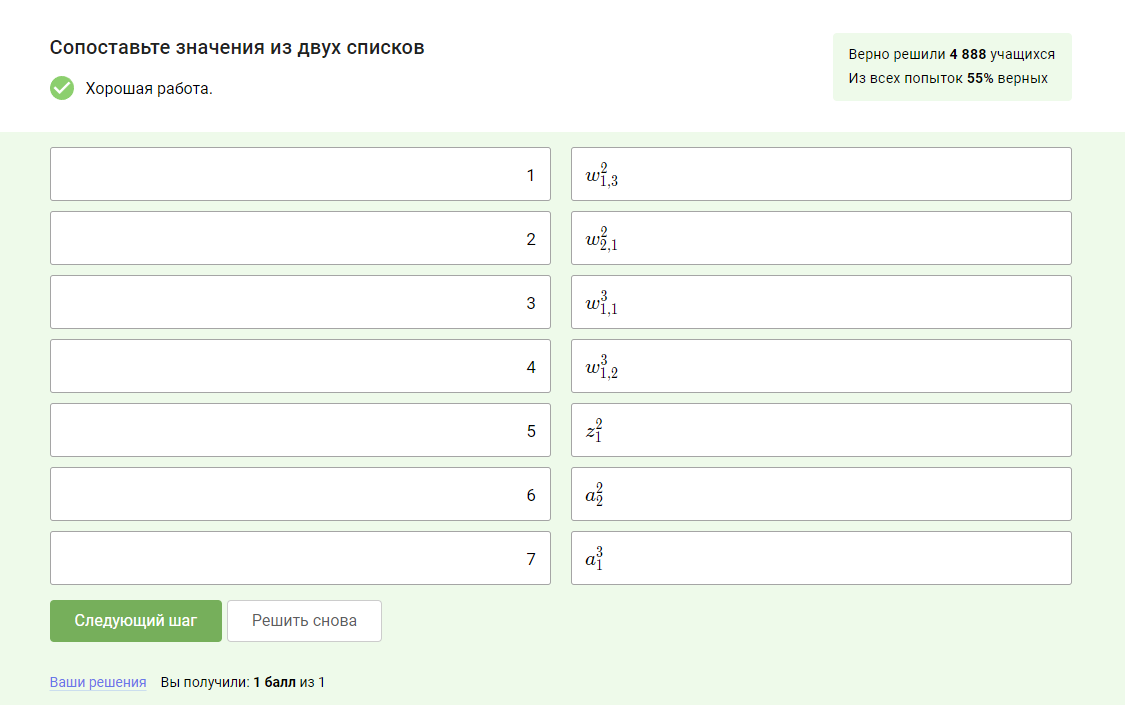

# Вопрос
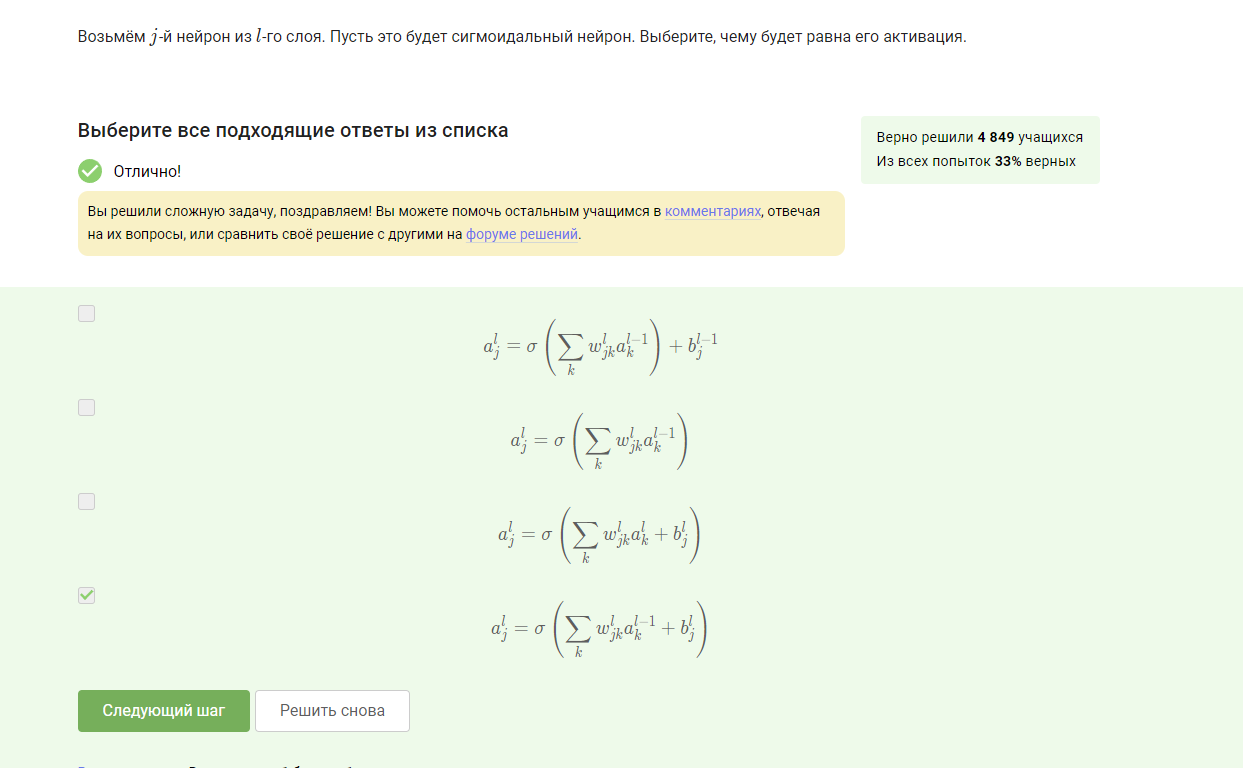

# Вопрос
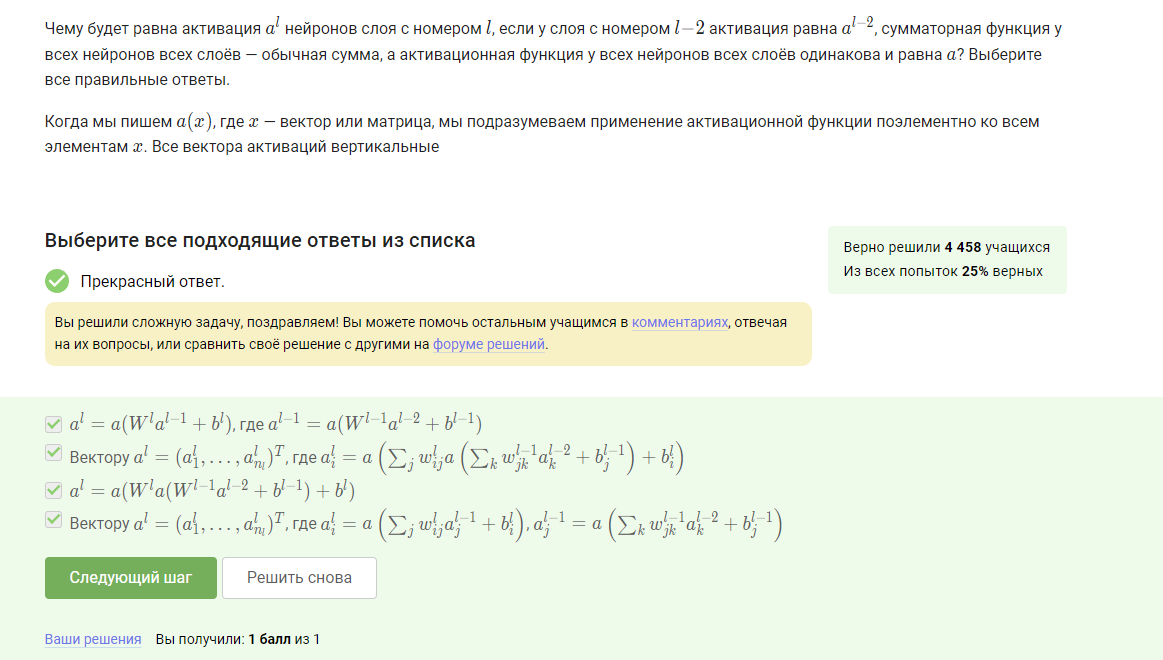

# Вопрос
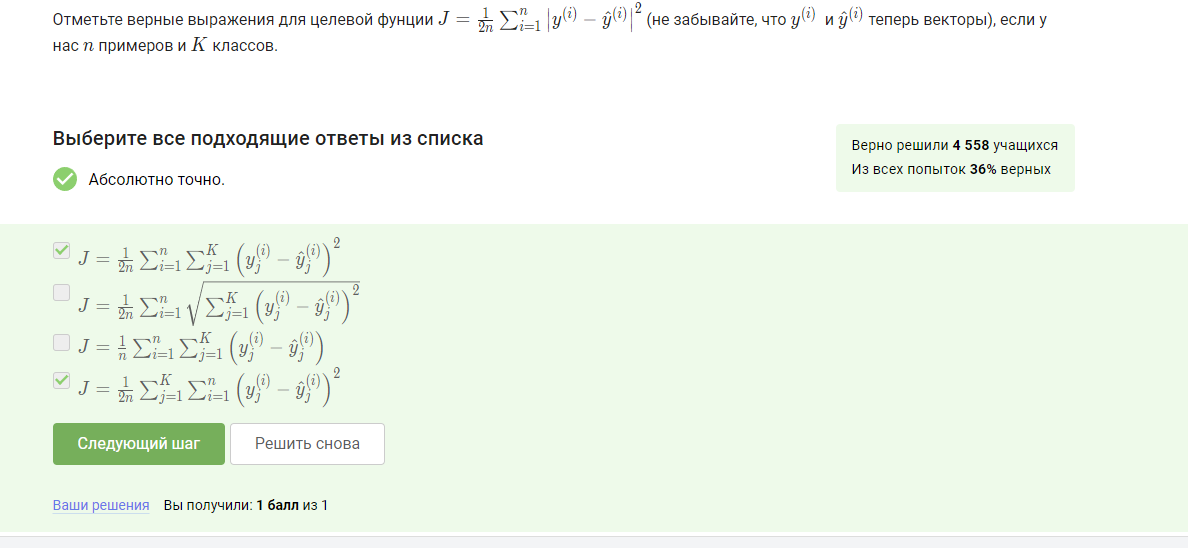

# Вопрос
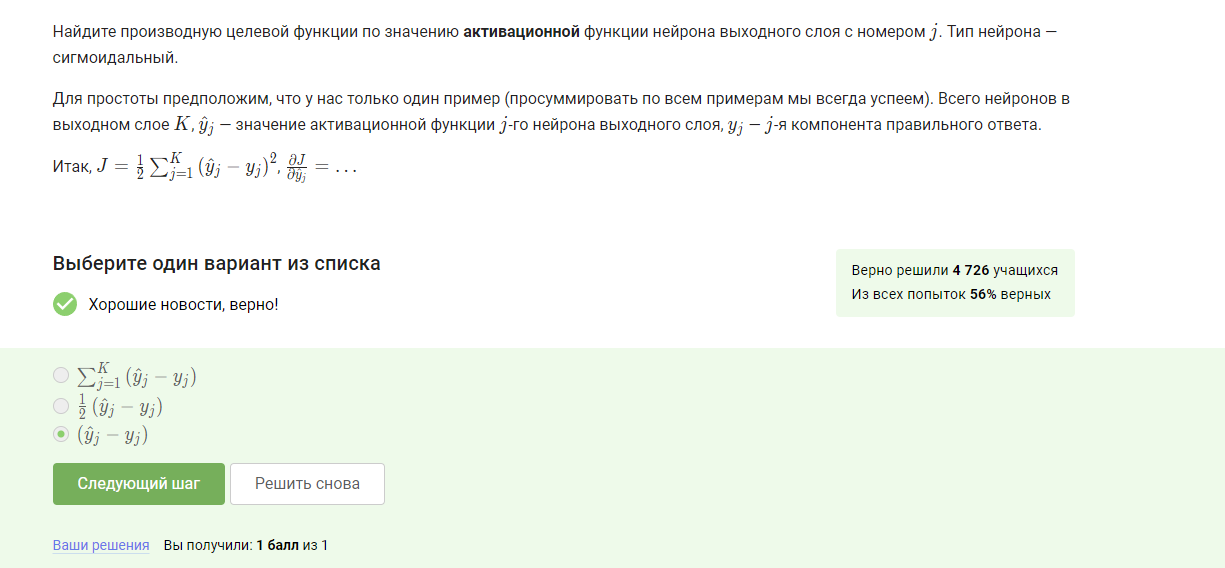

# Вопрос
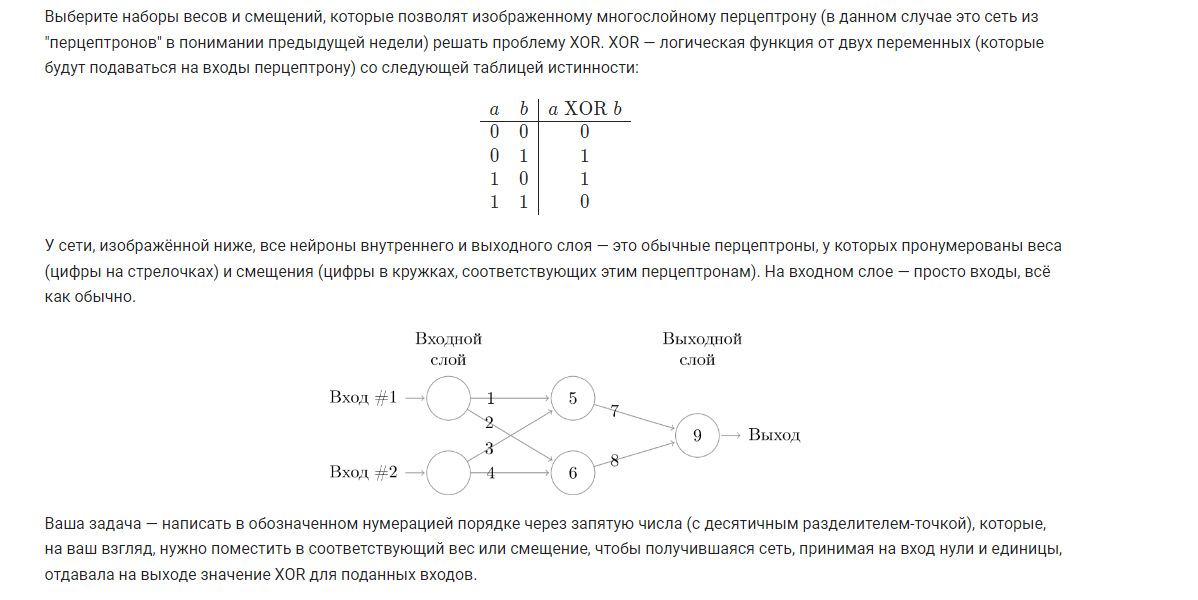

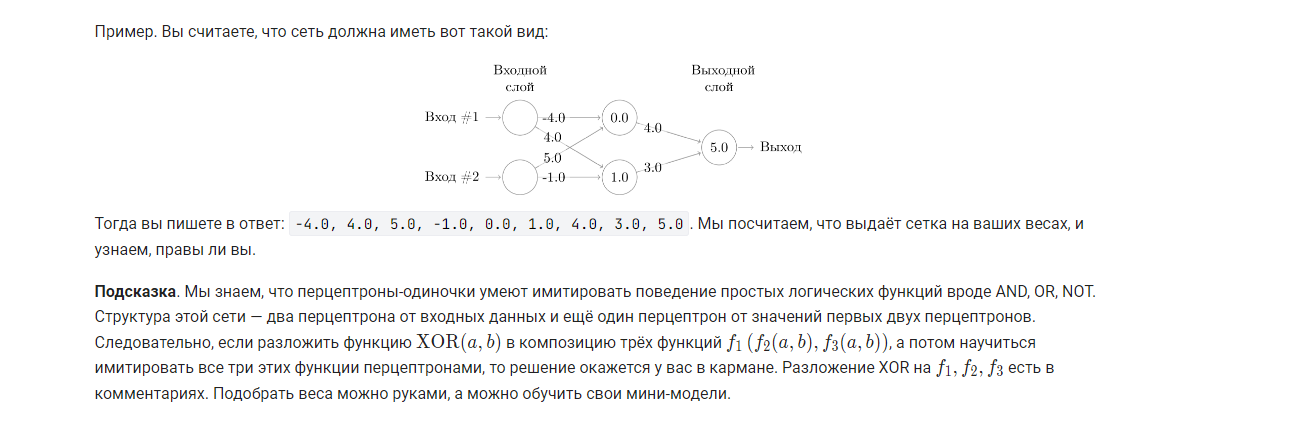

In [2]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras

x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0 , 1, 1, 0])

model = keras.Sequential([
    keras.layers.Dense(2, activation=tf.math.sigmoid),
    keras.layers.Dense(1, activation=tf.math.sigmoid)
])


model.compile(optimizer=tf.train.GradientDescentOptimizer(1),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x, y, epochs=5000)

print(model.get_weights())

AttributeError: module 'tensorflow._api.v2.train' has no attribute 'GradientDescentOptimizer'

In [3]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense

import numpy as np
import tensorflow as tf
import tensorflow.keras as keras

x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

model = keras.Sequential([
    keras.layers.Dense(2, activation=tf.math.sigmoid),
    keras.layers.Dense(1, activation=tf.math.sigmoid)
])


model.compile(optimizer=tf.train.GradientDescentOptimizer(1), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x, y, epochs=5000)

print(model.get_weights())

AttributeError: module 'tensorflow._api.v2.train' has no attribute 'GradientDescentOptimizer'

In [4]:
class Perceptron:
    def __init__(self, w, b):
        self.w = w
        self.b = b
        
    def forward_pass(self, single_input):
        result = 0
        for i in range(0, len(self.w)):
            result += self.w[i] * single_input[i]
        result += self.b

        if result > 0:
            return 1
        else:
            return 0

    def train_on_single_example(self, example, y):
#         out = int(self.w.T.dot(example) + self.b > 0) # в матричном виде, без self.forward_pass
        out = self.forward_pass(example)
        error = y - out
        self.w = self.w + error * example
        self.b = self.b + error
        return error
    
    def train_until_convergence(self, input_matrix, y, max_steps=1e8):
        i = 0
        errors = 1
        while errors and i < max_steps:
            i += 1
            errors = 0
            for example, answer in zip(input_matrix, y):
                example = example.reshape((example.size, 1))
                error = self.train_on_single_example(example, answer)
                errors += 0 if error == 0 else 1  # ЗДЕСЬ БЫЛА ОШИБКА

In [12]:
w = np.array([[0,0]]).T
p1 = Perceptron(w.copy(), 0) # a1 = AND(not(a),b)
p2 = Perceptron(w.copy(), 0) # a2 = AND(a, not(b))
p3 = Perceptron(w.copy(), 0) # OR(a1, a2)
X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
y1 = np.array([[0, 0, 1, 0]]).T
y2 = np.array([[0, 1, 0, 0]]).T
y3 = np.array([[0, 1, 1, 1]]).T
p1.train_until_convergence(X, y1)
p2.train_until_convergence(X, y2)
p3.train_until_convergence(X, y3)
print(p1.w, p1.b)
print(p2.w, p2.b)
print(p3.w, p3.b)

for example in X:
    print(example)
    a = p1.forward_pass(example)
    b = p2.forward_pass(example)
    print(p3.forward_pass([a, b]))

[[-2]
 [ 1]] [0]
[[ 1]
 [-1]] [0]
[[1]
 [1]] [0]
[0 0]
0
[1 0]
1
[0 1]
1
[1 1]
0


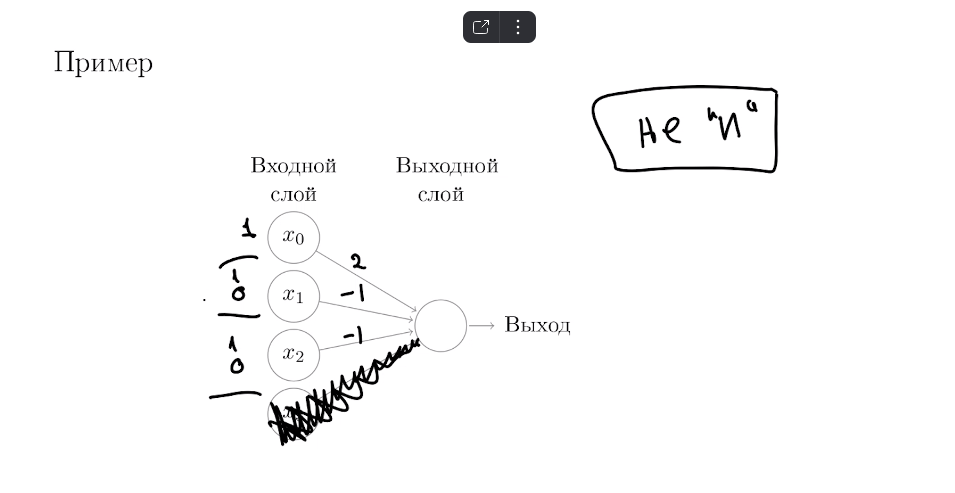

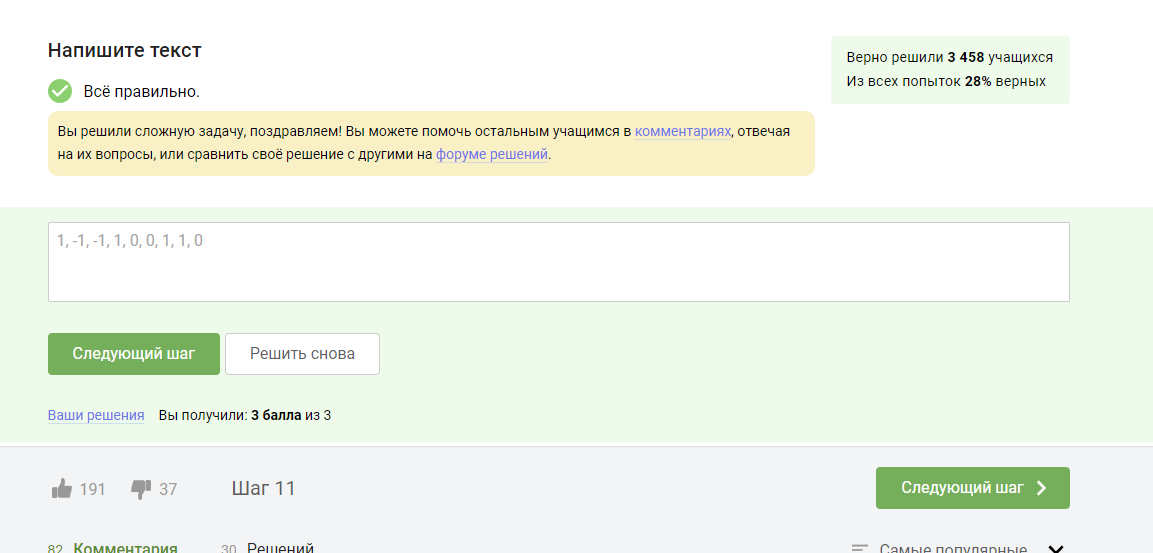

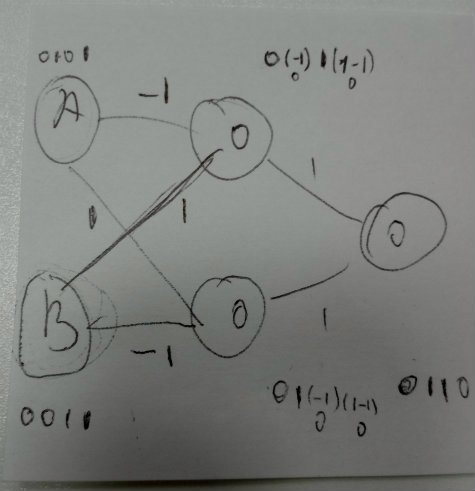

In [ ]:
-1,1,1,-1,0,0,1,1,0

In [6]:
import numpy as np
import random

class Neyron:
    def __init__(self, w, b):
        self.w = w
        self.b = b

    def forward_pass(self, single_input):
        result = 0
        for i in range(0, len(self.w)):
            result += self.w[i] * single_input[i]
        result += self.b

        if result > 0:
            return 1
        else:
            return 0

    def train_on_single_example(self, example, y):
        error = y - self.forward_pass(example)
        self.w = self.w + error * example
        self.b = self.b + error
        return error

    def train_until_convergence(self, examples, y, max_steps=10000):
        i = 0
        errors = 1
        while errors and i < max_steps:
            i += 1
            errors = 0
            for example, answer in zip(examples, y):
                example = example.reshape((example.size, 1))
                error = self.train_on_single_example(example, answer)
                errors += int(error)
        print(i)


w = np.random.random_integers(20, size=(2)).reshape(2, 1)
b = random.randint(10, 20)
neyron1 = Neyron(w, b)
examples = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
y = np.array([0, 1, 1, 1])[:, np.newaxis]
neyron1.train_until_convergence(examples, y)

w = np.random.random_integers(20, size=(2)).reshape(2, 1)
b = random.randint(10, 20)
neyron2 = Neyron(w, b)
y = np.array([1, 1, 1, 0])[:, np.newaxis]
neyron2.train_until_convergence(examples, y)

w = np.random.random_integers(20, size=(2)).reshape(2, 1)
b = random.randint(10, 20)
examples = np.array([[0, 1], [1, 1], [1, 0]])
neyron3 = Neyron(w, b)
y = np.array([0, 1, 0])[:, np.newaxis]
neyron3.train_until_convergence(examples, y)

print(str(float(np.round(neyron1.w, 4)[0]))+',', str(float(np.round(neyron2.w, 4)[0]))+',', str(float(np.round(neyron1.w, 4)[1]))+',',
      str(float(np.round(neyron2.w, 4)[1]))+',', str(float(np.round(neyron1.b, 4)))+',',
      str(float(np.round(neyron2.b, 4)))+',', str(float(np.round(neyron3.w, 4)[0]))+',',
      str(float(np.round(neyron3.w, 4)[1]))+',', str(float(np.round(neyron3.b, 4))))


15
7
10
5.0, 1.0, 14.0, -4.0, 0.0, 4.0, -3.0, 5.0, 0.0


/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:39: DeprecationWarning: This function is deprecated. Please call randint(1, 20 + 1) instead
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:46: DeprecationWarning: This function is deprecated. Please call randint(1, 20 + 1) instead
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:52: DeprecationWarning: This function is deprecated. Please call randint(1, 20 + 1) instead


In [ ]:
понимая, что это neuron(neuron(x2 - x1) + neuron(x1 - x2)) решение становится очевидным.
1, -1, -1, 1, 0, 0, 1, 1, 0

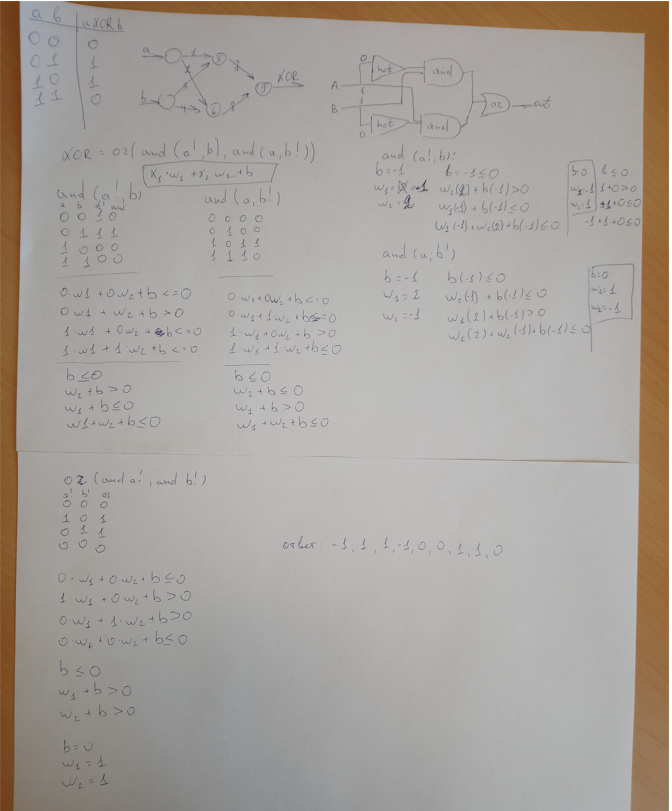

In [ ]:
Раскладываем как a xor b = (a or b) and not(a and b)
1.0, -1.0, 1.0, -1.0, 0.0, 2.0, 1.0, 1.0, -1.0

# Вопрос

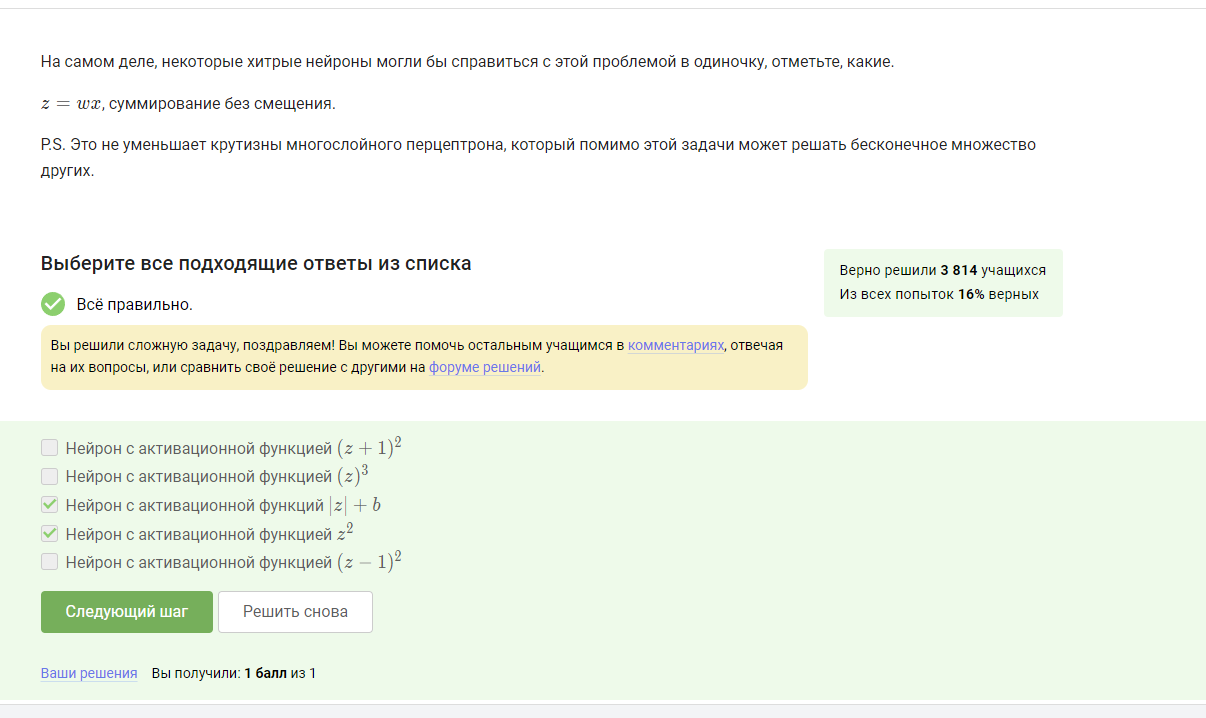